# Assignment 5 Report

Author : Varun Sundar, EE16B068

We use ipython notebooks for the following assignment. The repository includes the relevant pip requirements.

Ensure python 3.6 is installed, and run:
```
pip3 install -r requirements.txt
jupyter lab
```

This should open a browser window with the code snippets.

# Question 1

In [9]:
import numpy as np
import math
import scipy
from control.matlab import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pie=np.pi

We design for $M_p = 17$, $T_s = 3$ 

In [10]:
Mp=17
Ts=3

In [11]:
real=-(4.0/Ts)
imag=4*pie/(Ts*np.log(100/Mp))
pole1=complex(real,imag)
pole2=complex(real,imag)
theta=180-np.angle(pole1,deg=True)
wn=np.abs(pole1)
print (pole1,pole2)
print(theta,wn)

(-1.3333333333333333+2.3639346657109117j) (-1.3333333333333333+2.3639346657109117j)
60.57563766283309 2.714031112851792


In [12]:
(num,den)=zpk2tf([],[0,-1],1)
H=tf(num,den)
print(H)


   1
-------
s^2 + s



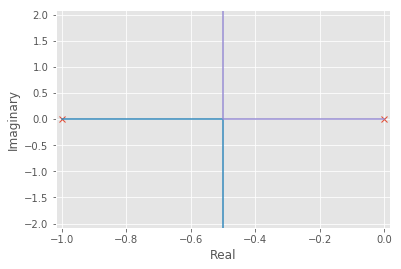

In [13]:
rlocus(H)
plt.show()

In [14]:
anl=np.angle(evalfr(H,pole1),deg=True)
print (anl)

142.54939989916585


## Part 3

Clearly this doesnot lie on the root locus, hence we need a lead compensator. We calculate $\phi$, the necessary angle difference. In addition we calculate $\theta$ the positive angle made by the dominant pole, by either $arccos(\zeta)$ or from the angle directly.

In [45]:
th=np.angle(pole1+1,deg=True)+np.angle(pole1,deg=True)
phi=-180+th
print(f"Phi {phi}")
theta=180-np.angle(pole1,deg=True)
print(f"Theta {theta}")
gamma=0.5*(180-theta-phi)
print(f"Gamma {gamma}")
alpha=np.sin(gamma*pie/180)*np.sin((theta+gamma+phi)*pie/180)/np.sin((theta+gamma)*pie/180)/np.sin((gamma+phi)*pie/180)
print(f"Alpha {alpha}")
zc=wn*np.sin(gamma*pie/180)/np.sin((theta+gamma)*pie/180)
pc=zc/alpha
print (f"zc {zc} pc {pc}")

Phi 37.45060010083418
Theta 60.57563766283309
Gamma 40.986881118166366
Alpha 0.44819287447848166
zc 1.8169680716950904 pc 4.053986966681072


In [49]:
Hnew = H * tf([1,zc],[1,pc])
Hnew


        s + 1.817
-------------------------
s^3 + 5.054 s^2 + 4.054 s

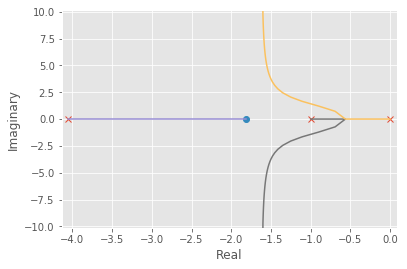

In [36]:
rlocus(Hnew);

In [52]:
mag = np.abs(evalfr(Hnew,pole1))
phase = np.angle(evalfr(Hnew,pole1),deg=True)
print (f"Phase at pole {phase}")
K=1.0/mag
print(f"K {K}")
Hlead=K*Hnew
print(f"Hlead compensator only {Hlead}")

Phase at pole -180.0
K 9.678165381551548
Hlead compensator only 
     9.678 s + 17.58
-------------------------
s^3 + 5.054 s^2 + 4.054 s



In [23]:
Kv=K*zc/pc
print (Kv)

4.337684762035719


## Plot with only lead compensator

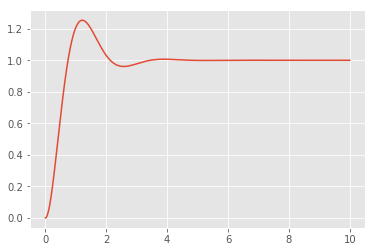

In [54]:
T = linspace(0,10,1000)
(y,T)=step(feedback(Hlead),T)
plt.plot(T,y)

In [55]:
def stepinfo(t,yout):
    print ("OS",(yout.max()/yout[-1]-1)*100,'%')
    print ("Tr",t[next(i for i in range(0,len(yout)-1) if yout[i]>yout[-1]*.90)]-t[0])
    print ("Ts",t[next(len(yout)-i for i in range(2,len(yout)-1) if abs(yout[-i]/yout[-1])>1.02)]-t[0])

In [26]:
stepinfo(T,y)

OS 25.39881214713917 %
Tr 0.6706706706706707
Ts 2.032032032032032


## $\alpha*\beta=1$

In [56]:
beta=1.0/alpha
zg=0.05
pg=zg/beta
Hlag=tf([1,zg],[1,pg])
Hleadlag=Hlead*Hlag
Hleadlag


      9.678 s^2 + 18.07 s + 0.8792
---------------------------------------
s^4 + 5.076 s^3 + 4.167 s^2 + 0.09085 s

OS 26.16900489320202 %
Tr 0.6706706706706707
Ts 2.042042042042042
Kv: 20.0


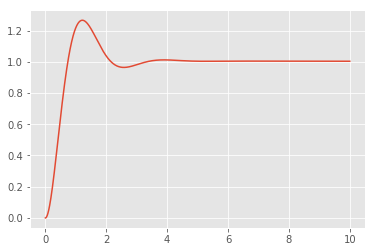

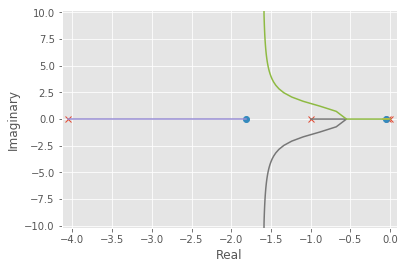

In [41]:
T=linspace(0,10,1000)
(y,T)=step(Hleadlag/(1+Hleadlag),T)
plt.plot(T,y)
stepinfo(T,y);
print ("Kv:",Kv*beta)
rlocus(Hleadlag);

## Part 4, 6 Independent $\alpha$, $\beta$

We set $\beta = Kv_{desired}/Kv_{obtained}$ , when obtained from the lead compensator.

In [29]:
Kv_desire=20
beta=Kv_desire/Kv
zg=0.05
pg=zg/beta
H_lag=tf([1,zg],[1,pg])
Hlead_lag=Hlead*Hlag
print(Hlead_lag)


      9.678 s^2 + 18.07 s + 0.8792
---------------------------------------
s^4 + 5.076 s^3 + 4.167 s^2 + 0.09085 s



We plot the step response and the root locus of the above system.

OS 26.16900489320171 %
Tr 0.6706706706706707
Ts 2.042042042042042


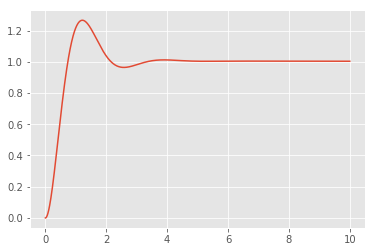

In [37]:
T=linspace(0,10,1000)
(y,T)=step(feedback(Hlead_lag),T)
plt.plot(T,y)
stepinfo(T,y);

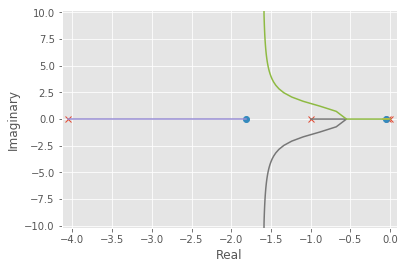

In [38]:
rlocus(Hleadlag);